# Sentiment Analysis

 Add a new column to the dataset with the sentiment tag Positive, Neutral or Negative

In [3]:
import pandas as pd
from textblob import TextBlob

# Read the updated CSV file into a DataFrame
merged_df = pd.read_csv('restaurants_reviews_details_friendly.csv')

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    # Classify the polarity of the review
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

# Add a new column 'sentiment' with the result of sentiment analysis
merged_df['sentiment'] = merged_df['text'].apply(analyze_sentiment)

# Display the DataFrame with the sentiment column
print(merged_df)

# Save the DataFrame with the sentiment column to a new CSV file
merged_df.to_csv('sentiment_analysis_results.csv', index=False)


                             place_name  \
0                    Restaurant Olijfje   
1                    Restaurant Olijfje   
2                    Restaurant Olijfje   
3                    Restaurant Olijfje   
4                    Restaurant Olijfje   
..                                  ...   
95  Saint Morris Argentinian Restaurant   
96  Saint Morris Argentinian Restaurant   
97  Saint Morris Argentinian Restaurant   
98  Saint Morris Argentinian Restaurant   
99  Saint Morris Argentinian Restaurant   

                                    formatted_address  phone_number  \
0   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
1   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
2   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
3   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
4   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
..                                                ...    

In [5]:
# Count the occurrences of each sentiment
sentiment_counts = merged_df['sentiment'].value_counts()

# Display the counts
print(sentiment_counts)

sentiment
Positive    97
Negative     3
Name: count, dtype: int64


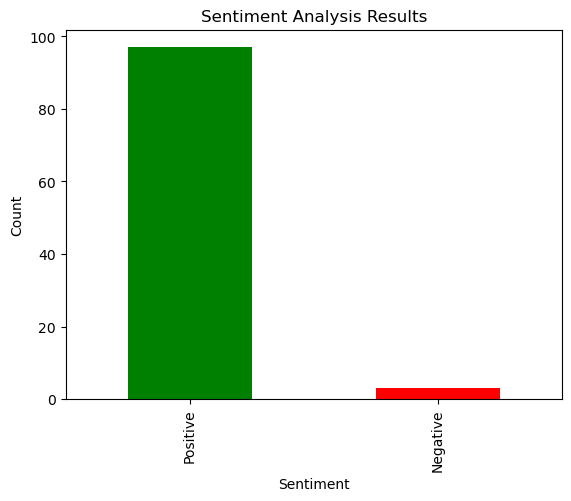

In [6]:
import matplotlib.pyplot as plt

# Plot the counts
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [7]:
import pandas as pd
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Read the updated CSV file into a DataFrame
merged_df = pd.read_csv('sentiment_analysis_results.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(str(text).lower())
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to the "text" column
merged_df['preprocessed_text'] = merged_df['text'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(merged_df['preprocessed_text'])
corpus = [dictionary.doc2bow(text) for text in merged_df['preprocessed_text']]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15, random_state=42)

# Display the topics and their associated words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to /Users/davega/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davega/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/davega/nltk_data...


(0, '0.014*"restaurant" + 0.014*"great" + 0.013*"service" + 0.011*"place" + 0.010*"nice"')
(1, '0.025*"good" + 0.025*"food" + 0.013*"nice" + 0.013*"service" + 0.011*"restaurant"')
(2, '0.014*"food" + 0.010*"good" + 0.008*"great" + 0.007*"also" + 0.007*"nice"')


# iterate each comment from "text" column to correspond to one of the following 4 summaries ideas: 

Nice place
Good food
Good service
Good price

In [8]:
import pandas as pd
from textblob import TextBlob

# Read the updated CSV file into a DataFrame
merged_df = pd.read_csv('sentiment_analysis_results.csv')

# Function to assign a summary idea based on sentiment and keywords
def assign_summary_idea(text):
    analysis = TextBlob(str(text))
    # Classify the polarity of the review
    sentiment = 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

    # Check for keywords to assign a summary idea
    keywords = {
        'Nice place': ['nice', 'beautiful', 'lovely', 'charming'],
        'Good food': ['good food', 'delicious', 'tasty', 'yummy'],
        'Good service': ['good service', 'excellent service', 'friendly staff', 'helpful staff'],
        'Good price': ['good price', 'affordable', 'reasonable prices', 'value for money']
    }

    for idea, idea_keywords in keywords.items():
        if any(keyword in text.lower() for keyword in idea_keywords):
            return f'{sentiment} - {idea}'

    return f'{sentiment} - Other'

# Add a new column 'summary_idea' with the assigned summary idea
merged_df['summary_idea'] = merged_df['text'].apply(assign_summary_idea)

# Display the updated DataFrame
print(merged_df)

# Save the updated DataFrame to a new CSV file
merged_df.to_csv('summary_ideas_results.csv', index=False)


                             place_name  \
0                    Restaurant Olijfje   
1                    Restaurant Olijfje   
2                    Restaurant Olijfje   
3                    Restaurant Olijfje   
4                    Restaurant Olijfje   
..                                  ...   
95  Saint Morris Argentinian Restaurant   
96  Saint Morris Argentinian Restaurant   
97  Saint Morris Argentinian Restaurant   
98  Saint Morris Argentinian Restaurant   
99  Saint Morris Argentinian Restaurant   

                                    formatted_address  phone_number  \
0   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
1   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
2   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
3   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
4   Valkenburgerstraat 223D, 1011 MJ Amsterdam, Ne...  020 330 4444   
..                                                ...    

In [9]:
# Count the occurrences of each summary_idea_counts
summary_idea_counts = merged_df['summary_idea'].value_counts()

# Display the counts
print(summary_idea_counts)

summary_idea
Positive - Nice place      48
Positive - Other           29
Positive - Good food       15
Positive - Good service     3
Negative - Other            3
Positive - Good price       2
Name: count, dtype: int64


# + BOT to see how sentiment analysis works

What to do now:

Run the script.
Enter some text when prompted.
The script will analyze the sentiment of the text and assign a mood emoji based on the sentiment.
The script will print the assigned emoji and sentiment polarity.
You can experiment with different text inputs to see how the sentiment and mood assignment change. If you have any specific questions or if there's something you'd like to modify, feel free to let me know!

In [ ]:
from textblob import TextBlob
from dataclasses import dataclass

@dataclass
class Mood:
    emoji: str
    sentiment: float

def get_mood(input_text: str, *, threshold: float) -> Mood:
    sentiment: float = TextBlob(input_text).sentiment.polarity

    if sentiment > threshold:
        return Mood('😊', sentiment)
    elif sentiment < -threshold:
        return Mood('😠', sentiment)
    else:
        return Mood('😐', sentiment)

if __name__ == '__main__':
    while True:
        text: str = input('Text:')
        mood: Mood = get_mood(text, threshold=0.3)
        print(f'{mood.emoji} {mood.sentiment}')


Text:lovely mood
😊 0.5
